# Лабораторная работа №5
Левицкий Валентин А-13-22

Вариант №23

In [246]:
import numpy as np
import matplotlib.pyplot as plt

## Задача 5.1


Дана функция $f(x)$. Приблизить функцию методом интерполяции,
используя многочлен Лагранжа. Степень многочлена $N$ подобрать экспериментально
таким образом, чтобы максимальная величина погрешности на отрезке $[a, b]$ не превышала заданной величины $\varepsilon$.
Построить графики функции, многочлена и график погрешностей.

$
f(x) = \sqrt{x - 2},\ x \in [2.2, 4];
$

$\varepsilon = 10^{-6}. $

Составить таблицу значений функции в $n+1$
точке отрезка, то есть задать массивы $x$ и
$y$ исходных данных.

In [274]:
f = lambda x: np.sqrt(x - 2)
a, b = 2+0.2, 4
n = 20

X_train = np.linspace(a, b, n+1)
Y_train = f(X_train)

Составить подпрограмму, выполняющую вычисление функции в произвольной точке $t$
отрезка $[a, b]$
с помощью интерполяционного многочлена Лагранжа $L(t)$.

In [275]:
def lagrange_polynomial(x, y):
    n = x.size
    delta_x = np.zeros((n, n))
    for i in range(n):
        for j in range(i):
            delta_x[i, j] = x[i] - x[j]
            delta_x[j, i] = -delta_x[i, j]

    def L(t):
        result = 0
        for i in range(n):
            # print(y[i])
            li = y[i]
            for j in range(n):
                if j == i:
                    continue
                li *= (t - x[j]) / delta_x[i, j]
            result += li
        return result
    return L

L = lagrange_polynomial(X_train, Y_train)

Построить график функции погрешности $RL(t)=|f (t)−L(t)|$ на отрезке интерполяции
и по графику определить максимальную величину полученной погрешности
приближения. Если точность не достигнута, то увеличить число узлов интерполяции.
Найти значение $n=N$, при котором точность достигается.

In [276]:
X = np.linspace(a, b, 1000)
Y_lag = np.array([L(x) for x in X])
Y = f(X)

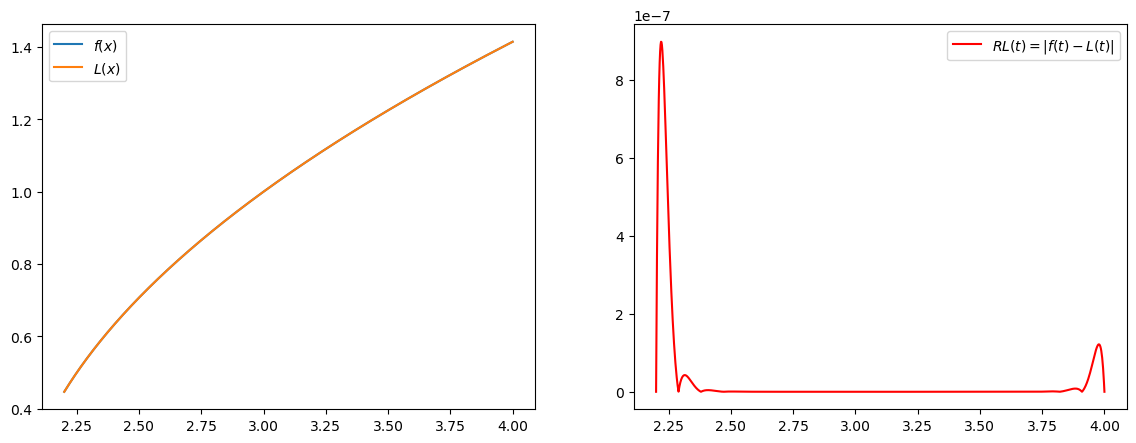

In [278]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(X, Y, label='$f(x)$')
ax1.plot(X, Y_lag, label='$L(x)$')
ax1.legend()
ax2.plot(X, np.abs(Y - Y_lag), color='red', label='$RL(t) = |f(t) - L(t)|$')
ax2.legend()

Отрезок $[a, b]$ был выбран таким образом, чтобы функция на нем поддавалась интерполяции с помощью многочлена Лагранжа с точностью $\varepsilon$ (была достаточно гладкой)